In [1]:
# set work dir
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.reload_library()
plt.style.use("science")
from matplotlib import cm

In [3]:
def drawPlot(grids, n, d, e):
    regrets, elapses = getRow(grids, n, d, e)
    # color map
    cmap = cm.get_cmap("Set2")
    colors = cmap(np.linspace(0, 1, 8))
    # time
    fig = plt.figure(figsize=(16, 8))
    plt.plot(elapses["lr"], marker="v", markersize=8, color=colors[0], linewidth=3)
    plt.plot(elapses["rf"], marker="v", markersize=8, color=colors[1], linewidth=3)
    plt.plot(elapses["spo"], marker="v", markersize=8, color=colors[2], linewidth=3)
    plt.plot(elapses["bb"], marker="v", markersize=8, color=colors[3], linewidth=3)
    plt.ylim(-100, 1300)
    plt.xticks(ticks=[0,1,2], labels=["{}x{}".format(g[0], g[1]) for g in grids], fontsize=28)
    plt.yticks(fontsize=24)
    plt.xlabel("Graph Size", fontsize=36)
    plt.ylabel("Runtime (Sec)", fontsize=36)
    plt.title("Training Set Size = {},\nPolynomial Degree = {},\nNoise Half−width = {}".format(n,d,e), fontsize=30)
    plt.legend(["2-stage LR", "2-stage RF", "SPO+","DBB"], fontsize=24)
    plt.show()
    fig.savefig("./images/scale-sp-n{}d{}e{}-time.png".format(n,d,int(10*e)), dpi=600)
    # loss
    fig = plt.figure(figsize=(16, 8))
    plt.plot(regrets["lr"], marker="v", markersize=8, color=colors[0], linewidth=3)
    plt.plot(regrets["rf"], marker="v", markersize=8, color=colors[1], linewidth=3)
    plt.plot(regrets["spo"], marker="v", markersize=8, color=colors[2], linewidth=3)
    plt.plot(regrets["bb"], marker="v", markersize=8, color=colors[3], linewidth=3)
    plt.ylim(-0.02, 0.53)
    plt.xticks(ticks=[0,1,2], labels=["{}x{}".format(g[0], g[1]) for g in grids], fontsize=28)
    plt.yticks(fontsize=24)
    plt.xlabel("Graph Size", fontsize=36)
    plt.ylabel("Normalized Regret", fontsize=36)
    plt.title("Training Set Size = {},\nPolynomial Degree = {},\nNoise Half−width = {}".format(n,d,e), fontsize=30)
    plt.legend(["2-stage LR", "2-stage RF", "SPO+","DBB"], fontsize=24)
    plt.show()
    fig.savefig("./images/scale-sp-n{}d{}e{}-loss.png".format(n,d,int(10*e)), dpi=600)

In [4]:
def getRow(grids, n, d, e):
    regrets = {"lr":[], "rf":[], "spo":[], "bb":[]}
    elapses = {"lr":[], "rf":[], "spo":[], "bb":[]}
    for g in grids:
        l, t = getData(g, n, d, e)
        for m in regrets:
            regrets[m].append(l[m])
            elapses[m].append(t[m])
    return regrets, elapses

In [5]:
def getData(grid, n, d, e):
    # dir
    dir_name = "./res/sp/h{}w{}/gurobi".format(grid[0], grid[1])
    file_name = {}
    file_name["lr"] = "n{}p5-d{}-e{}_2s-lr.csv".format(n,d,e)
    file_name["rf"] = "n{}p5-d{}-e{}_2s-rf.csv".format(n,d,e)
    file_name["spo"] = "n{}p5-d{}-e{}_spo_lr_adam0.001_bs32_l10.0l20.0_c8.csv".format(n,d,e)
    file_name["bb"] = "n{}p5-d{}-e{}_bb_lr_adam0.01_bs128_l10.0l20.0_c8-lamb20.csv".format(n,d,e)
    # load data
    regret, elapse = {}, {}
    for m, f in file_name.items():
        df = pd.read_csv(dir_name + "/" + f)
        regret[m] = df["Unamb SPO"].mean()
        if n == 100:
            elapse[m] = df["Elapsed"].mean()
        if n == 1000:
            elapse[m] = df["Elapsed"].mean() / 3
    return regret, elapse

In [6]:
grids = [(5,5), (10,10), (15,15)]

## Deg = 2 

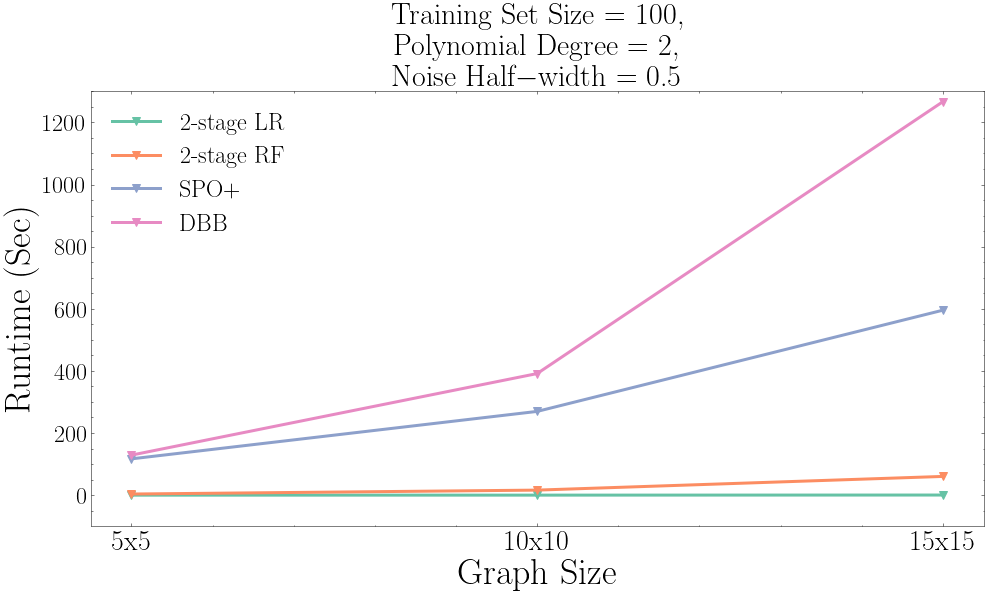

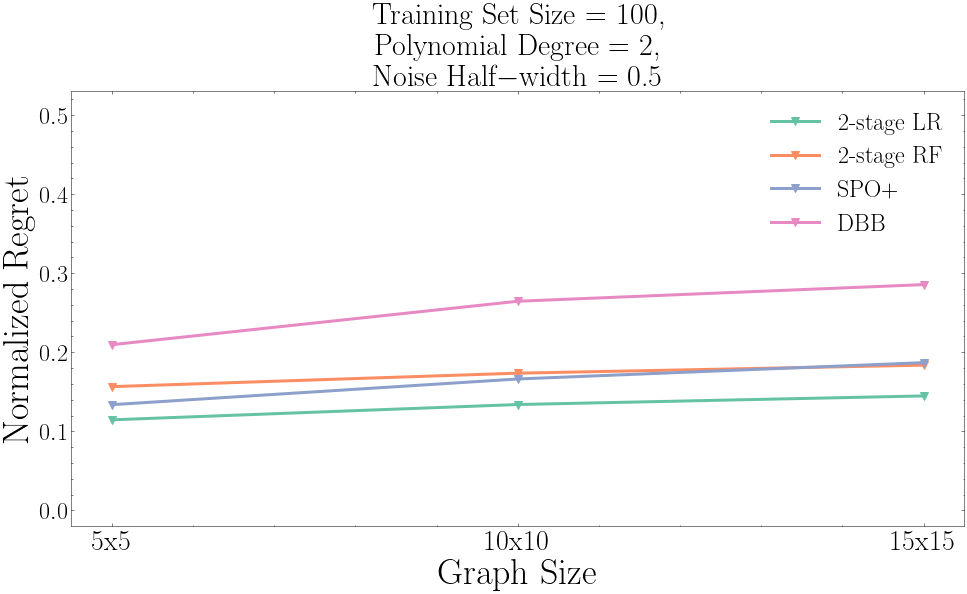

In [7]:
n = 100
d = 2
e = 0.5
drawPlot(grids, n, d, e)

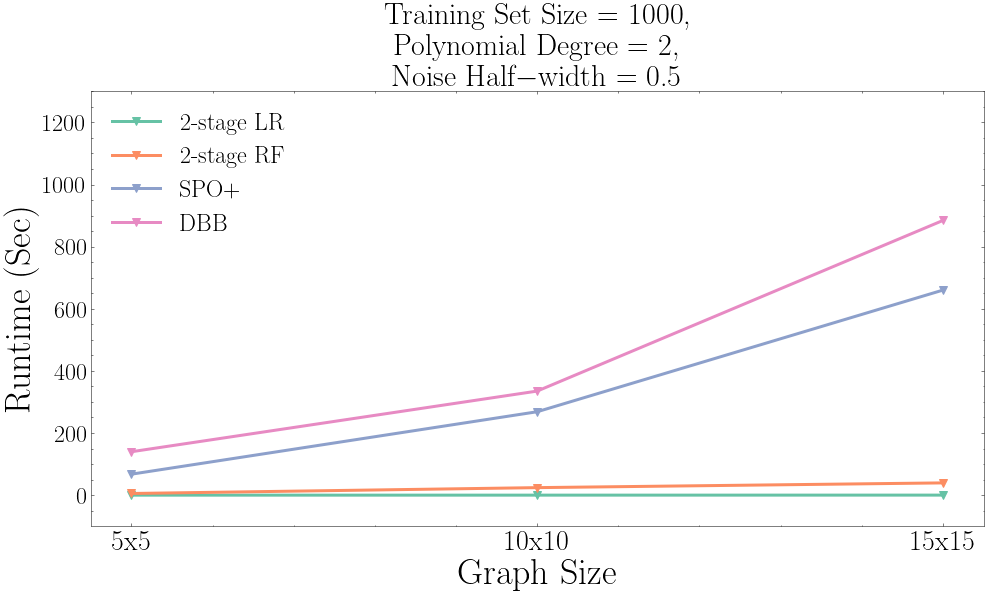

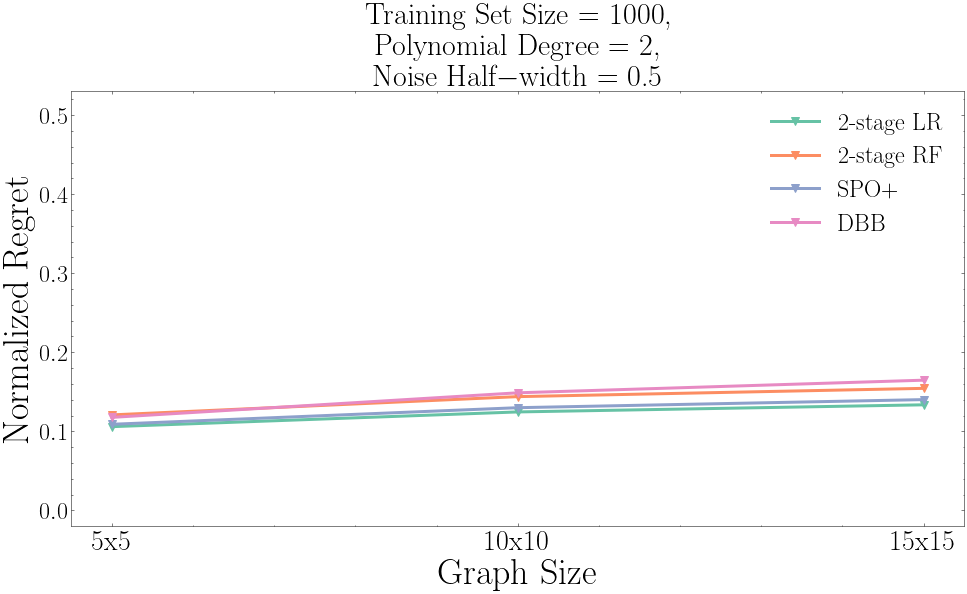

In [8]:
n = 1000
d = 2
e = 0.5
drawPlot(grids, n, d, e)

## Deg = 4 

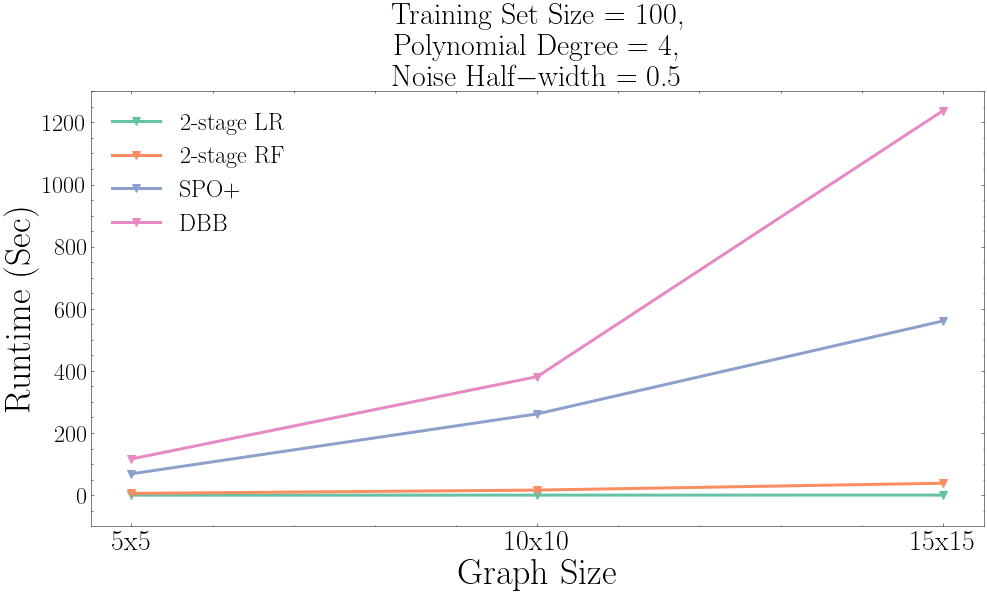

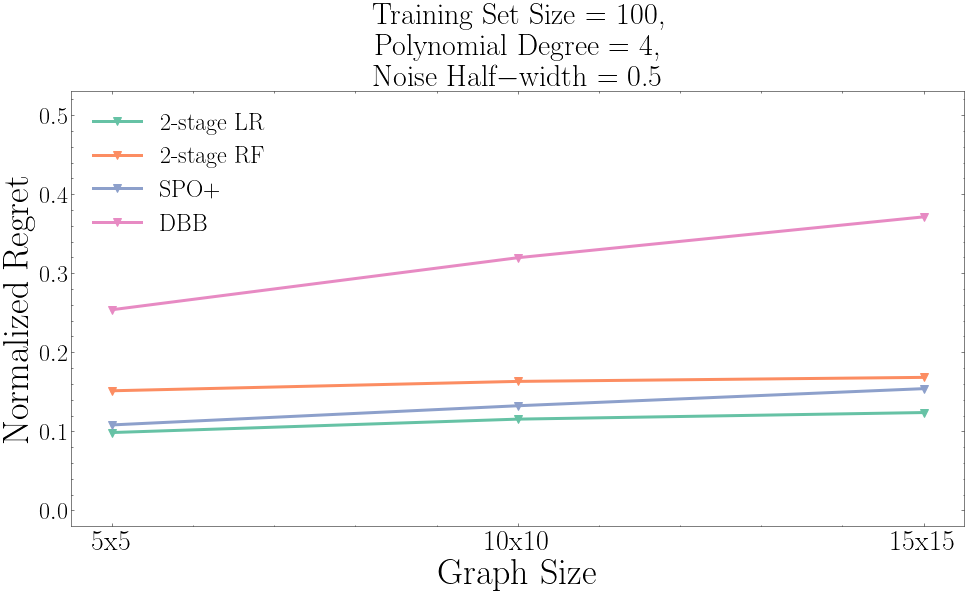

In [9]:
n = 100
d = 4
e = 0.5
drawPlot(grids, n, d, e)

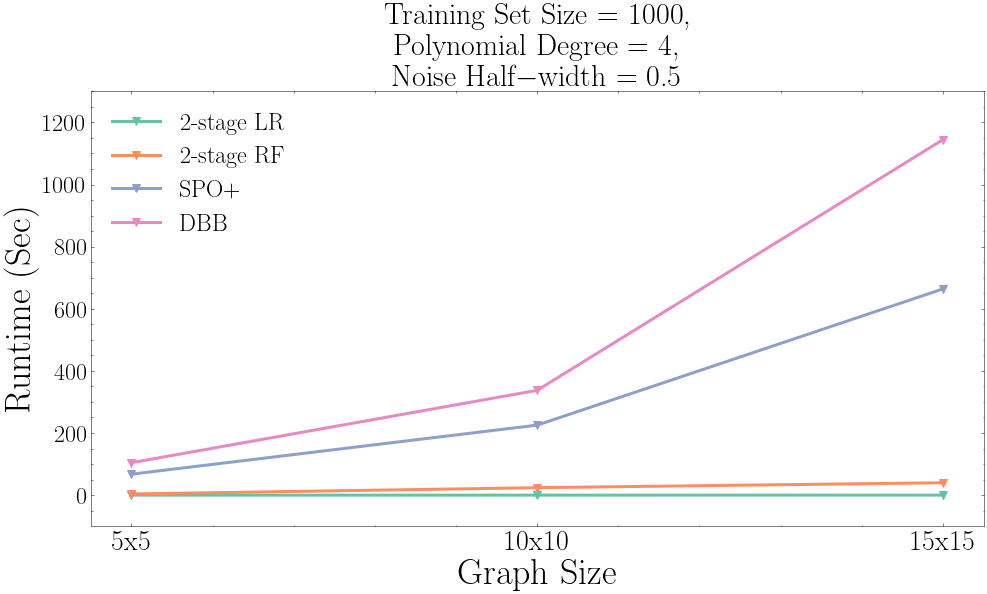

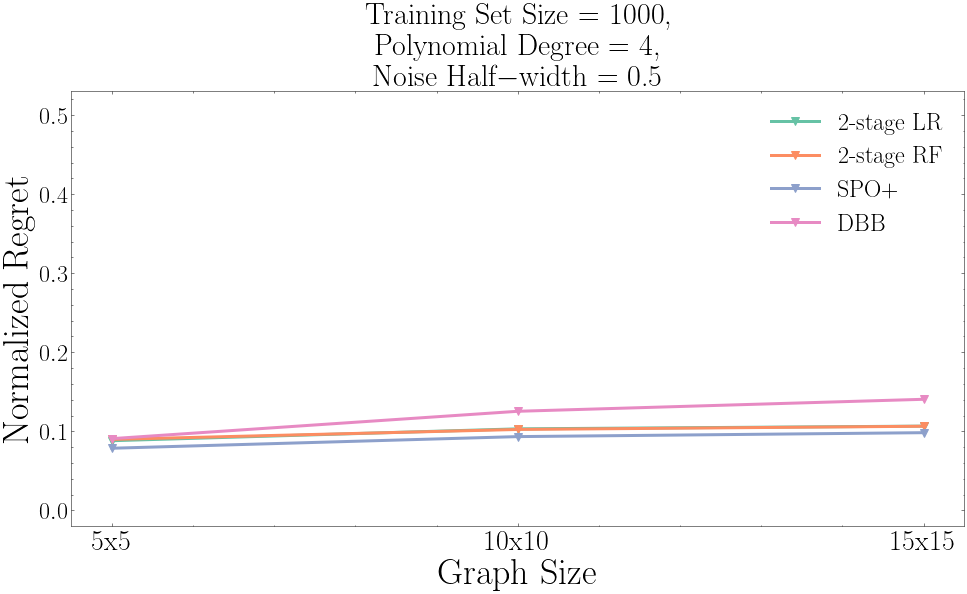

In [10]:
n = 1000
d = 4
e = 0.5
drawPlot(grids, n, d, e)

## Deg = 6

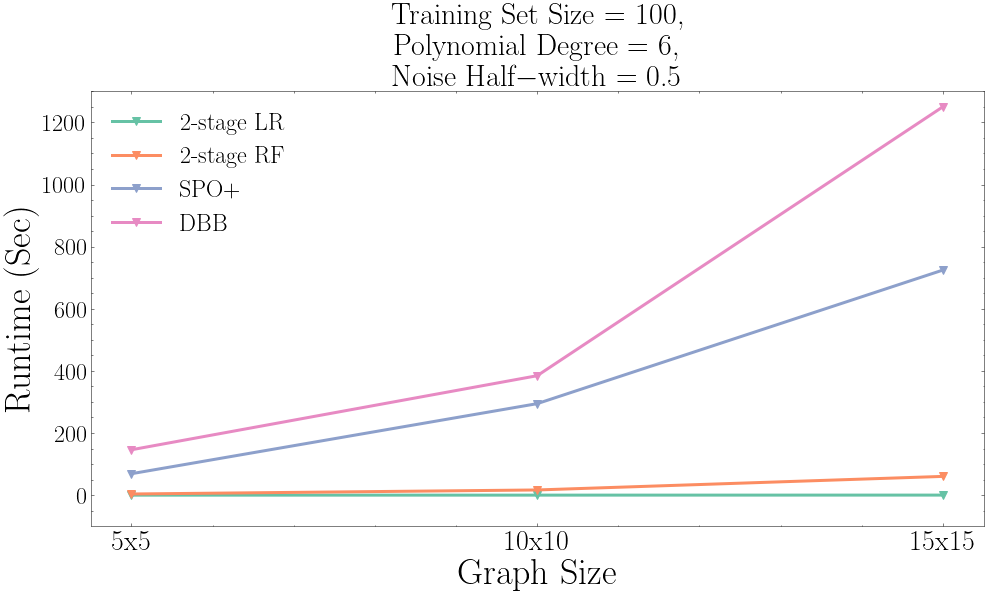

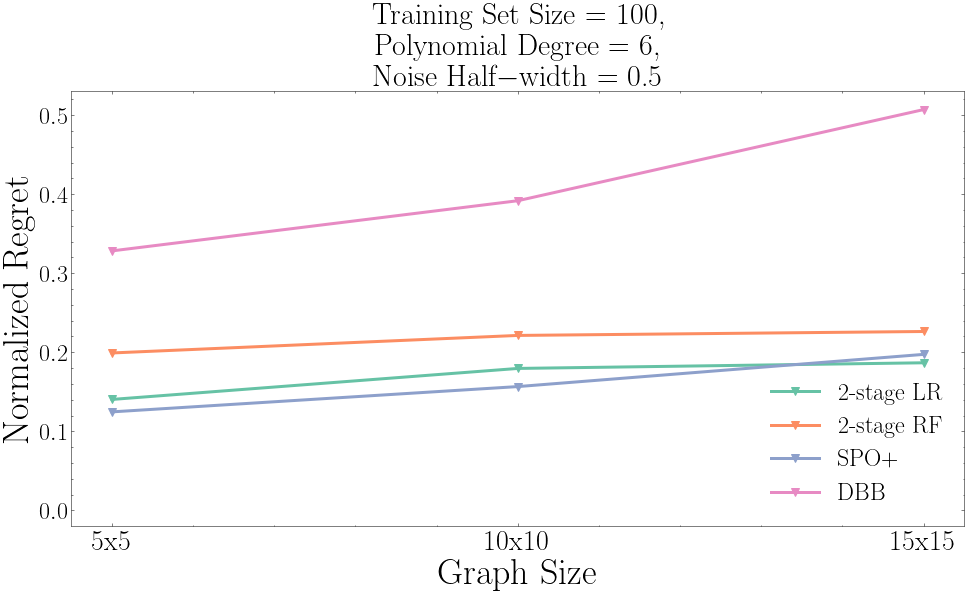

In [11]:
n = 100
d = 6
e = 0.5
drawPlot(grids, n, d, e)

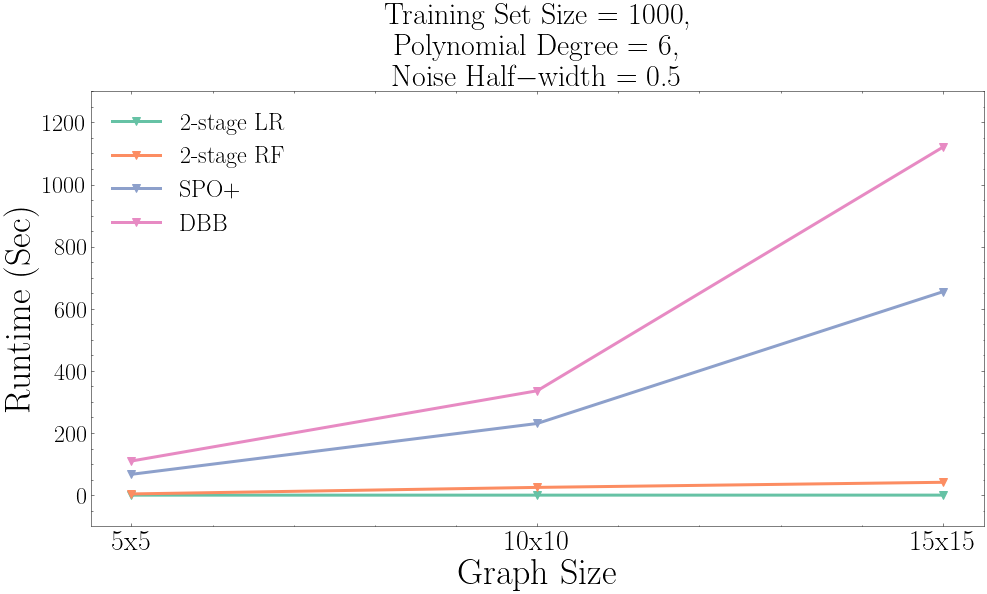

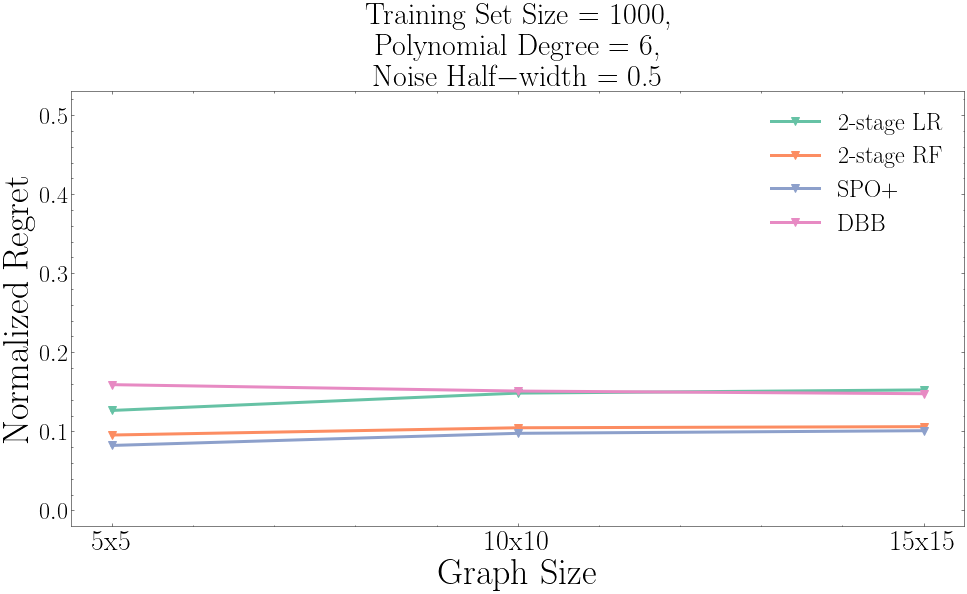

In [12]:
n = 1000
d = 6
e = 0.5
drawPlot(grids, n, d, e)